In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab04.ipynb")

# Lab 4: Visualization, Transformations, and KDEs

### Objective
In this lab, you will get some practice plotting, applying data transformations, and working with Kernel Density Estimators (KDEs). We will be working with data from the World Bank containing various statistics for countries and territories around the world. 

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**The on-time deadline is Tuesday, September 26, 11:59 PM. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here:*

### Lab Walkthrough
In addition to the lab notebook, we have also released a prerecorded walkthrough video of the lab. This playlist includes a walkthrough for every question in the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.


**Note:** These videos were recorded in Spring 2023. There may be slight inconsistencies between the version you are viewing and the version used in the recording, but the content is identical.

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo("v=2Jd1edAOT4E", list='PLQCcNQgUcDfp1e51PkXRnvBI3A7vvEhGd', istType = 'playlist')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

<br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Loading Data

Let's load some World Bank data into a `pd.DataFrame` object named ```wb```.

In [4]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns.  Take a look:

In [5]:
display(Markdown('\n'.join(fr'{i + 1}. {c}'.replace('$', r'\$') for i, c in enumerate(wb.columns))))

1. Primary completion rate: Male: % of relevant age group: 2015
2. Primary completion rate: Female: % of relevant age group: 2015
3. Lower secondary completion rate: Male: % of relevant age group: 2015
4. Lower secondary completion rate: Female: % of relevant age group: 2015
5. Youth literacy rate: Male: % of ages 15-24: 2005-14
6. Youth literacy rate: Female: % of ages 15-24: 2005-14
7. Adult literacy rate: Male: % ages 15 and older: 2005-14
8. Adult literacy rate: Female: % ages 15 and older: 2005-14
9. Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015
10. Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015
11. Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015
12. Population: millions: 2016
13. Surface area: sq. km thousands: 2016
14. Population density: people per sq. km: 2016
15. Gross national income, Atlas method: \$ billions: 2016
16. Gross national income per capita, Atlas method: \$: 2016
17. Purchasing power parity gross national income: \$ billions: 2016
18. per capita: \$: 2016
19. Gross domestic product: % growth : 2016
20. per capita: % growth: 2016
21. Prevalence of smoking: Male: % of adults: 2015
22. Prevalence of smoking: Female: % of adults: 2015
23. Incidence of tuberculosis: per 100,000 people: 2015
24. Prevalence of diabetes: % of population ages 20 to 79: 2015
25. Incidence of HIV: Total: % of uninfected population ages 15-49: 2015
26. Prevalence of HIV: Total: % of population ages 15-49: 2015
27. Prevalence of HIV: Women's share of population ages 15+ living with HIV: %: 2015
28. Prevalence of HIV: Youth, Male: % of population ages 15-24: 2015
29. Prevalence of HIV: Youth, Female: % of population ages 15-24: 2015
30. Antiretroviral therapy coverage: % of people living with HIV: 2015
31. Cause of death: Communicable diseases and maternal, prenatal, and nutrition conditions: % of population: 2015
32. Cause of death: Non-communicable diseases: % of population: 2015
33. Cause of death: Injuries: % of population: 2015
34. Access to an improved water source: % of population: 1990
35. Access to an improved water source: % of population: 2015
36. Access to improved sanitation facilities: % of population: 1990
37. Access to improved sanitation facilities: % of population: 2015
38. Child immunization rate: Measles: % of children ages 12-23 months: 2015
39. Child immunization rate: DTP3: % of children ages 12-23 months: 2015
40. Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016
41. Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016
42. Children sleeping under treated bed nets: % of children under age 5: 2009-2016
43. Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016
44. Tuberculosis: Treatment success rate: % of new cases: 2014
45. Tuberculosis: Cases detection rate: % of new estimated cases: 2015

<hr style="border: 1px solid #fdb515;" />

# Part 1: Scaling
In the first part of this lab, we will look at the distribution of values for the *combined adult literacy rate* as well as *the gross national income per capita*. The code below creates a copy of the `DataFrame` that contains only the two `Series` we want and then drops all rows that contain `null` values in either column.

**Note:** For this lab, we are dropping `null` values without investigating them further. However, this is generally not the best practice and can severely affect our analyses.

Here, the combined literacy rate is the sum of the female and male literacy rates as reported by the World Bank. 0 represents no literacy, and 200 represents total literacy by both genders that are included in the World Bank's dataset.

In this lab, we will be using the `sns.histplot`, `sns.rugplot`, and `sns.displot` functions to visualize distributions. You may find it useful to consult the `seaborn` documentation on [distributions](https://seaborn.pydata.org/tutorial/distributions.html) and [functions](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

In [6]:
# Run this next line to create a DataFrame with the appropriate index; no further action is needed.
df = pd.DataFrame(index=wb.index)

# Run this next line to create copies of the Series we want; no further action is needed.
# The "\" syntax lets us continue to write on the next line.
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'] \
            + wb["Adult literacy rate: Male: % ages 15 and older: 2005-14"]
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']

# Run this next line to drop all records that have a NaN value in either column; no further action is needed.
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 147


In [7]:
df.head(5)

,lit,inc
Afghanistan,63.0,580.0
Albania,194.0,4250.0
Algeria,151.0,4270.0
Angola,142.0,3440.0
Antigua and Barbuda,197.0,13400.0


<br>

---
## Question 1a

Suppose we wanted to build a histogram of our data to understand the distribution of literacy rates and income per capita individually. We can use [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) in `seaborn` to create bar charts from categorical data. 

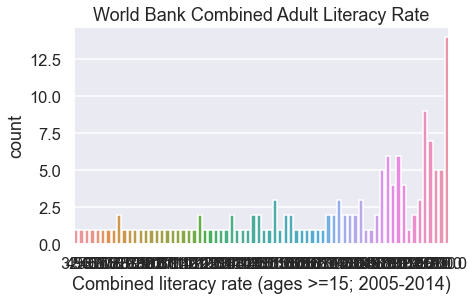

In [8]:
sns.countplot(data=df, x="lit")
plt.xlabel("Combined literacy rate (ages >=15; 2005-2014)")
plt.title('World Bank Combined Adult Literacy Rate');

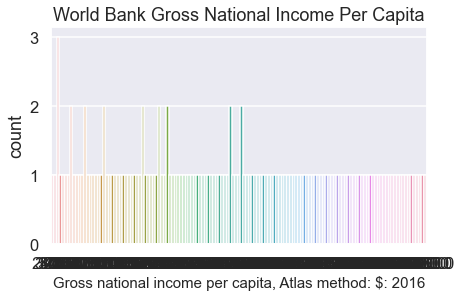

In [9]:
sns.countplot(data=df, x="inc")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016', fontsize=15)
plt.title('World Bank Gross National Income Per Capita');

In the cell below, explain why `countplot` is NOT the right tool for visualizing the distribution of our data.


_Type your answer here, replacing this text._

For a continuous variable like income, countplot is not going to give very interesting results.  One should discretize the data by using bins.

<br>

---
## Question 1b

In the cell below, create a plot of **income per capita** (the second plot above) using the [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function. 
Don't forget to title the plot and label axes!

Optional: Create two side-by-side subplots, where the left subplot is **income**, and the right subplot is **literacy**. 

**Hint:** *Copy and paste from above to start.*

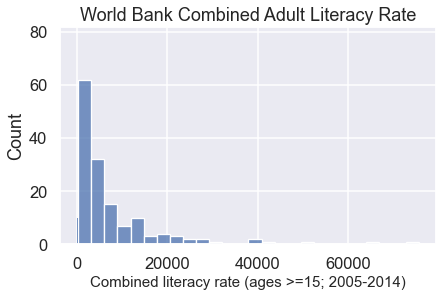

In [12]:
sns.histplot(data=df, x="inc")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016', fontsize=15)
plt.title('World Bank Gross National Income Per Capita');

sns.histplot(data=df, x="lit")
plt.xlabel("Combined literacy rate (ages >=15; 2005-2014)")
plt.title('World Bank Combined Adult Literacy Rate');

You should see histograms that show the counts of how many data points appear in each bin. `displot` uses a heuristic called the [Freedman-Diaconis rule](https://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html) to automatically identify the best bin sizes, though it is possible to set the bins yourself we will not be doing so in this lab.

In the cell below, we explore overlaying a `rugplot` on top of a `displot` using `rugplot`. Note that the `rugplot` is hard to see.

In [ ]:
# Run this cell to overlay a rugplot on the displot; no further action is needed.
sns.displot(data=df, x="inc")
sns.rugplot(data=df, x="inc")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016', fontsize=15)
plt.title('World Bank Gross National Income Per Capita');

In the cell below, we explore overlaying a `rugplot` on top of a `histplot`. One way to make it easier to see the difference between the rug plot and the bars is to set a different color. For example:

In [ ]:
# Run this cell to overlay a rugplot on the histplot; no further action is needed.
sns.histplot(data=df, x="inc", color="lightsteelblue")
sns.rugplot(data=df, x="inc")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016', fontsize=15)
plt.title('World Bank Gross National Income Per Capita');

There is also another function called `kdeplot`, which plots a Kernel Density Estimate (KDE) as described in class and will be covered in more detail later in this lab. 

Rather than manually calling `histplot`, `rugplot`, and `kdeplot` to plot histograms, rug plots, and KDE plots, respectively, we can instead modify how we use `displot` to simultaneously generate all three types of plots and adjust colors automatically for visibility. Using the documentation for [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) ([link](https://seaborn.pydata.org/generated/seaborn.displot.html)), make a plot of the income data that includes a histogram, rug plot, and KDE plot. 

In [ ]:
# Run this cell to generate a displot; no further action is needed.
sns.displot(data=df, x="inc", rug=True, kde=True)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016', fontsize=15)
plt.title('World Bank Gross National Income Per Capita');

You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. 

Above, the y-axis is labeled by the counts. We can also label the y-axis by the density. An example is given below, this time using the literacy data from the beginning of this lab.

In [ ]:
# Run this cell to generate a displot; no further action is needed.
sns.displot(data=df, x="lit", rug=True, kde=True, stat="density")
plt.xlabel("Combined adult literacy rate (%) ages >=15; 2005-14", fontsize=14)
plt.title('World Bank Combined Adult Literacy Rate');

Observations:

* You'll also see that the y-axis value is no longer the count. Instead, it is a value such that the total **area** in the histogram is 1. For example, the area of the last bar is approximately $18.67 \times 0.03 = 0.56$.
* The KDE is a smooth estimate of the distribution of the given variable. The area under the KDE is also 1. While it is not obvious from the figure, some of the area under the KDE is beyond 100% literacy. In other words, the KDE is non-zero for values greater than 100%. This, of course, makes no physical sense. Nonetheless, it is a mathematical feature of the KDE.

We'll talk more about KDEs later in this lab.

<br>

---
## Question 1c

Looking at the income data, it is difficult to see the distribution among low-income countries because they are all scrunched up at the left side of the plot. The KDE also has a problem where the density function has a lot of area below 0. 

Transforming the `inc` data logarithmically gives us a more symmetric distribution of values. This can make it easier to see patterns.

In addition, summary statistics like the mean and standard deviation (square root of the variance) are more stable with symmetric distributions.

In the cell below, make a distribution plot of `inc` with the data transformed using `np.log10` and set the arguments `kde=True` and `stat='density'`. 

Don't forget to title the plot and label axes! If your title(s) are too long and get cut off from the image, you can optionally set the `fontsize=` argument to adjust the font size. Take a look at the code above for examples!

**Hint:** Seaborn's plotting functions like [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) ([link](https://seaborn.pydata.org/generated/seaborn.displot.html)) have quite flexible parameters. Instead of setting `x=` as a column name, you can pass in a `Series` of the data you'd like to visualize.

In [ ]:
...

When a distribution has a long right tail (right-skewed distributions), a log transformation often does a good job of symmetrizing the distribution, as it did here. Long right tails are common with variables that have a lower limit on the values. 

On the other hand, long left tails are common with distributions of variables that have an upper limit, such as percentages (can't be higher than 100%) and GPAs (can't be higher than 4). That is the case for the literacy rate. Typically taking a power transformation such as squaring or cubing the values can help symmetrize a left-skewed distribution.

In the cell below, we will make a distribution plot of `lit` with the data transformed using a power, i.e., raise `lit` to the 2nd, 3rd, and 4th power. We plot the transformation with the 4th power below.


In [ ]:
# Run this cell to generate the plot; no further action is needed.
ax = sns.displot(data=df, x=df['lit']**4, kde=True, stat='density')
plt.xlabel("Combined adult literacy rate (%) ages >=15; 2005-2014", fontsize=14)
plt.ylabel('Density')
plt.title('World Bank Combined Adult Literacy Rate (4th power)', pad=30);

<br>

---
## Question 1d

If we want to examine the relationship between the combined adult literacy rate and the gross national income per capita, we need to make a scatter plot. 

In the cell below, create a scatter plot of untransformed income per capita and literacy rate using the `sns.scatterplot` function. Make sure to label both axes using `plt.xlabel` and `plt.ylabel`. Don't forget to title the plot and label axes! If your title(s) are too long and get cut off from the image, you can optionally set the `fontsize=` argument to adjust the font size. Take a look at the code above for examples!

In [ ]:
...

We can better assess the relationship between two variables when they have been straightened because it is easier for us to recognize linearity.

In the cell below, we see a scatter plot of log-transformed income per capita against literacy rate.

In [ ]:
sns.scatterplot(data=df, x='lit', y=np.log10(df['inc']))
plt.xlabel("Combined adult literacy rate (%) ages >=15; 2005-2014", fontsize=14)
plt.ylabel('Gross national income per capita (log scale)', fontsize=15)
plt.title('World Bank: Gross National Income Per Capita vs\n Combined Adult Literacy Rate');

This scatter plot looks better. The relationship is closer to linear.

We can think of the log-linear relationship between x and y as follows: a constant change in x corresponds to a percent (scaled) change in y.

Next, try squaring literacy and taking the log of income. Don't forget to title the plot and label axes! Does the plot look better? 


In [ ]:
plt.figure(figsize=(10,5))
...

Choosing the best transformation for a relationship is often a balance between keeping the model simple and straightening the scatter plot.

# Part 2: Kernel Density Estimation

In this part of the lab, you will develop a deeper understanding of how kernel density estimation works.

### Overview

Kernel density estimation is used to estimate a probability density function (i.e., a density curve) from a set of data. Just like a histogram, a density function's total area must sum to 1.

KDE centrally revolves around this idea of a "kernel". A kernel is a function whose area sums to 1. The three steps involved in building a kernel density estimate are:
1. Placing a kernel at each observation,
2. Normalizing kernels so that the sum of their areas is 1, and
3. Summing all kernels together.

The end result is a function that takes in some value `x` and returns a density estimate at the point `x`.

When constructing a KDE, there are several choices to make regarding the kernel. Specifically, we need to choose the function we want to use as our kernel, as well as a bandwidth parameter, which tells us how wide or narrow each kernel should be. We will explore these ideas now.

Suppose we have 3 data points with values 2, 4, and 9. We can compute the (useless) histogram with a KDE, as shown below. 

To understand how KDEs are computed, we need to see the KDE outside the given range. The easiest way to do this is to use an old function called `distplot` [(documentation)](https://seaborn.pydata.org/archive/0.11/generated/seaborn.distplot.html#seaborn.distplot). During the Fall 2023 offering of this course, `distplot` is still a working function in `seaborn`, but it will be removed at a future date. If you get an error that says that `distplot` is not a valid function, sorry, you are too far in the future to do this lab exercise.

In [ ]:
# Run this cell to create KDE plot and histogram using distplot; no further action is needed.
data3pts = np.array([2, 4, 9])
sns.distplot(data3pts, kde=True);

Using a deprecated function will often result in a `UserWarning`. You may follow their suggestions to adapt your code. In this case, we can use `displot` [(documentation)](https://seaborn.pydata.org/archive/0.11/generated/seaborn.displot.html#seaborn.displot) with some additional parameters. These additional parameters are needed because the default values of `displot` are different from `distplot`; we can manually set them to be the same.

In [ ]:
# Run this cell to create KDE plot and histogram using displot; no further action is needed.
plt.figure(figsize=(5, 15))
sns.displot(data3pts, kde=True, stat="density", kde_kws={"cut":4}, bins=2, height=5, aspect=1.5);

One question you might be wondering is how the kernel density estimator decides how "wide" each point should be. It turns out this is a parameter you can set called `bw`, which stands for bandwidth. For example, the code below gives a bandwidth value of 0.5 to each data point. You'll see the resulting KDE is quite different. Try experimenting with different values of bandwidth and see what happens.

In [ ]:
# Run this cell to plot distplot with the specified bandwidth. Try setting bw to different values.
sns.distplot(data3pts, kde=True, kde_kws={"bw": 0.5});

The equivalent plot using `displot` is provided below.

In [ ]:
# Run this cell to plot displot with the specified bandwidth. 
plt.figure(figsize=(5, 15))
sns.displot(data3pts, kde=True, stat="density", kde_kws={"bw_method": 0.5, "cut":4}, bins=2, height=5, aspect=1.5);

<br>

---
## Question 2a

As mentioned above, the kernel density estimate is just the sum of a bunch of copies of the kernel, each centered on our data points. The default kernel used by the `displot` function (as well as `kdeplot`) is the Gaussian kernel, given by:

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

We've implemented the Gaussian kernel for you in `python` below. Here, `alpha` is the smoothing or bandwidth parameter $\alpha$ for the KDE, `z` is the center of the Gaussian (i.e., a data point or an array of data points), and `x` is an array of values of the variable whose distribution we are plotting. In other words, `z` represents the center point of our smooth KDE bell curve, while `x` represents the range of values over which we want to generate the KDE plot.

In [ ]:
def gaussian_kernel(alpha, x, z):
    """
    Compute the Gaussian density estimate for values in x.

    Args:
        alpha: the smoothing parameter to pass to the kernel.
        x: an array of values whose density will be calculated.
        z: center of Gaussian.

    Returns:
        The smoothed estimate at values of x.
    """    
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

For example, we can plot the Gaussian kernel centered at 9 with $\alpha$ = 0.5 as below: 

In [ ]:
xs = np.linspace(-2, 12, 200)
alpha = 0.5
kde_curve = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, kde_curve);

In the cell below, plot the 3 kernel density functions corresponding to our 3 data points on the same axis. Use an `alpha` value of 0.5. Recall that our three data points are 2, 4, and 9. 

**Note:** Make sure to normalize your kernels! This means that the area under each of your kernels should be $\frac{1}{3}$ since there are three data points.

You don't have to use the following hints, but they might be helpful in simplifying your code.

**Hint:** The `gaussian_kernel` function can also take a `numpy` array as an argument for `z`.

**Hint:** To plot multiple plots at once, you can use `plt.plot(xs, y)` with a two-dimensional array as `y`.


In [ ]:
...

In the cell below, we see a plot that shows the sum of all three of the kernels above. The plot resembles the KDE shown when you called `distplot` function with bandwidth 0.5 earlier. The area under the final curve will be 1 since the area under each of the three normalized kernels is $\frac{1}{3}$.


In [ ]:
# Run this cell to plot the sum of the kernels; no further action is needed.
xs = np.linspace(-2, 12, 200)
alpha = 0.5
kde_curve = np.array([1/3 * gaussian_kernel(alpha, x, data3pts) for x in xs])
plt.plot(xs, np.sum(kde_curve, axis=1));

Recall that earlier we plotted the kernel density estimation for the logarithm of the income data, as shown again below.

In [ ]:
# Run this cell to plot KDE of log income; no further action is needed.
ax = sns.displot(data=df, x=np.log10(df['inc']), kind='kde', rug=True)
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016', fontsize=13)
plt.title('World Bank Gross National Income Per Capita');

In the cell below, a similar plot is shown using what was done in 2a. Try out different values of alpha in {0.1, 0.2, 0.3, 0.4, 0.5}. You will see that when `alpha=0.2`, the graph matches the previous graph well, except that the `displot` function hides the KDE values outside the range of the available data. Recall that `alpha` represents the spread of each individual kernel curve, which in turn affects the smoothness of the final KDE plot. When would you expect a smoother plot - when alpha = 0.1 or 0.5?

In [ ]:
# Run this cell to plot KDE of log income; try out different bandwidths!
xs = np.linspace(1, 6, 200)
alpha = 0.5
kde_curve = np.array([1/len(df['inc']) * gaussian_kernel(alpha, x, np.log10(df['inc'])) for x in xs])
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016', fontsize=13)
plt.ylabel("Density")
plt.title('World Bank Gross National Income Per Capita')
plt.plot(xs, np.sum(kde_curve, axis = 1));

<br>

---
## Question 2b

In your answers above, you hard-coded a lot of your work. In this problem, you'll build a more general kernel density estimator function.

Implement the KDE function, which computes:

$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where each $z_i$ represents a single datapoint in the collected dataset, $\alpha$ is a parameter to control the smoothness, and $K_\alpha$ is the kernel density function passed as `kernel`. Your code should run no longer than a couple of seconds. 


In [ ]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function with 3 parameters: alpha, x, and data.
        alpha: the smoothing parameter to pass to the kernel.
        x: a single query point (in one dimension).
        data: a numpy array of data points.

    Returns:
        The smoothed estimate at the query point x.
    """    
    ...
kde(gaussian_kernel, 1.0, 2.0, np.array([3.0, 4.0, 5.0, 7.0]))

In [ ]:
grader.check("q2b")

Assuming you implemented `kde` correctly, the code below should generate the `kde` of the log of the income data as before.

In [ ]:
# Run this cell to generate the kde of the log of the income datam; no further action is needed.
df['trans_inc'] = np.log10(df['inc'])
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], density=True, color='orange')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');
plt.title('World Bank Gross National Income Per Capita')
plt.plot(xs, curve, 'k-');

And the code below should show a 3 x 3 set of plots showing the output of the kde for different `alpha` values.

In [ ]:
# Run this cell to generate the kde of the log of the income data 
# with different alphas values, no further action is needed.
plt.figure(figsize=(15,15))
alphas = np.arange(0.2, 2.0, 0.2)
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i+1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], density=True, color='orange')
    plt.plot(xs, curve, 'k-')
plt.show()

<br>

---
## Question 2c


Let's take a look at another kernel, the Boxcar kernel. The function `boxcar_kernel` is defined below.

\begin{equation} \Large
K_{a}(x, z) =
    \begin{cases}
        \frac{1}{\alpha}, & \text{if } -\frac{\alpha}{2} \leq (x-z) \leq \frac{\alpha}{2}\\
        0, & \text{otherwise}
    \end{cases}
\end{equation}

In [ ]:
def boxcar_kernel(alpha, x, z):
    """
    Compute the boxcar density estimate for values in x.

    Args:
        alpha: the smoothing parameter to pass to the kernel.
        x: an array of values whose density will be calculated.
        z: center of boxcar function.

    Returns:
        The smoothed estimate at values of x.
    """    
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

Run the cell below to enable interactive plots.

In [ ]:
from ipywidgets import interact

Now, we can plot the Boxcar and Gaussian kernel functions to see what they look like.

In [ ]:
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1));

Using the interactive plot below, compare the two kernel techniques on the data `data3pts` or log income. Assign `demo = 1` to see `data3pts` or `demo = 2` to see log income.
(Note: Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [ ]:
demo = 1 # ... # set this value to 1 or 2

if demo == 1:
    xs = np.linspace(data3pts.min()-3, data3pts.max()+3, 1000)
    def f(alpha_g, alpha_b):
        plt.hist(data3pts, density=True, color='orange')
        g_curve = [kde(gaussian_kernel, alpha_g, x, data3pts) for x in xs]
        plt.plot(xs, g_curve, 'k-', label='Gaussian')
        b_curve = [kde(boxcar_kernel, alpha_b, x, data3pts) for x in xs]
        plt.plot(xs, b_curve, 'r-', label='Boxcar')
        plt.legend(title='Kernel Function')
        plt.show()
    interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1));
else:
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    def f(alpha_g, alpha_b):
        plt.hist(df['trans_inc'], density=True, color='orange')
        g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
        plt.plot(xs, g_curve, 'k-', label='Gaussian')
        b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
        plt.plot(xs, b_curve, 'r-', label='Boxcar')
        plt.legend(title='Kernel Function')
        plt.show()
    interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1));

Briefly compare and contrast the Gaussian and Boxcar kernels in the cell below. How do the two kernels relate with each other for the same alpha value?

_Type your answer here, replacing this text._

---
# Part 3: Seaborn's `sns.kdeplot` 
Now that you've explored how KDE is calculated and how it compares to other plots like histograms, scatterplots, boxcar kernels, and rugplots, it's time to practice using `sns.kdeplot` [(documentation)](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)! This lab will explore the 1-dimensional plotting capabilities of `kdeplot` while Homework 4 will explore its 2-dimensional plotting capabilities. 

---
## Question 3a
Let's revisit the **income per capita** data from question 1b. In the cell below, use `sns.kdeplot` to create a KDE plot of the income per capita. Don't forget to title the plot and label axes!

In [ ]:
...

--- 

## Question 3b
We can see that our curve extends into negative values of our x-axis, which doesn't fully make sense for a variable like the gross national income per capita. This happens because there are a lot of data points concentrated near 0, resulting in a plot that is skewed right. Transforming the plot logarithmically will give us a more symmetric distribution of values that can make it easier to see patterns.

Similar to question 1c, make a KDE plot that's scaled logarithmically (base 10). However, instead of manually transforming the data with `np.log10` and assigning the result to the `x=` argument, set the `kdeplot` arguments `x='inc'` and `log_scale=True`.

In [ ]:
...

--- 

## Question 3c

Compare your KDE plot from question 3b to the one from question 1c shown below: 

<img src='q1c.png' width="600px" />

Despite the graphs having different x-axes, the shape of their KDE plots look very similar. Why do you think that is? 

**Hint**: Notice the units and scale of the x-axes. Where is the log applied? 

_Type your answer here, replacing this text._

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Lab 4!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)